In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw_df = pd.read_csv("csv-files/house_price_regression_dataset.csv")
raw_df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


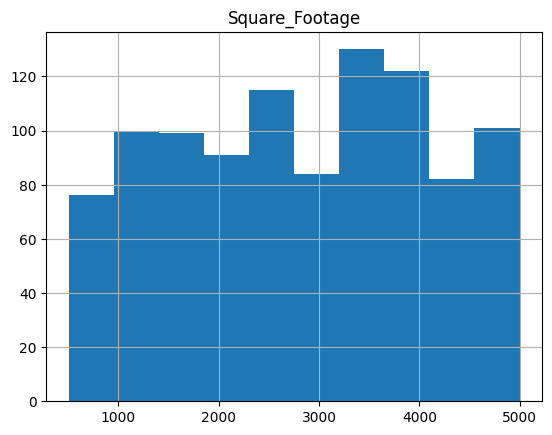

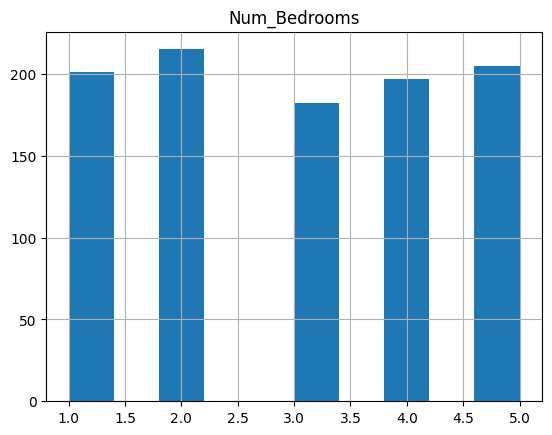

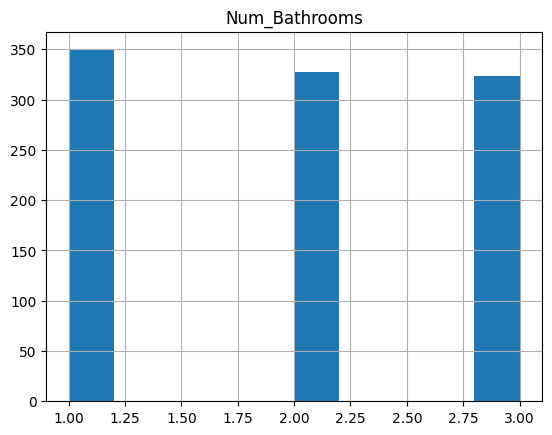

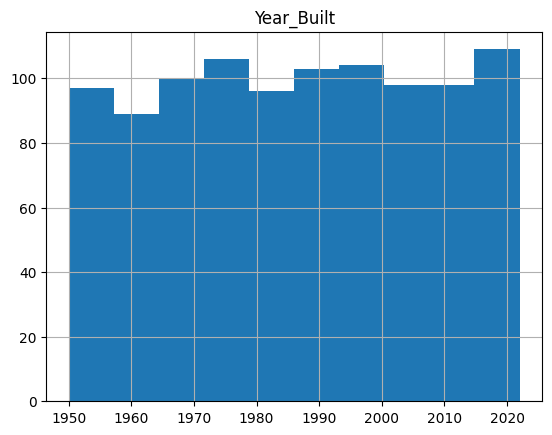

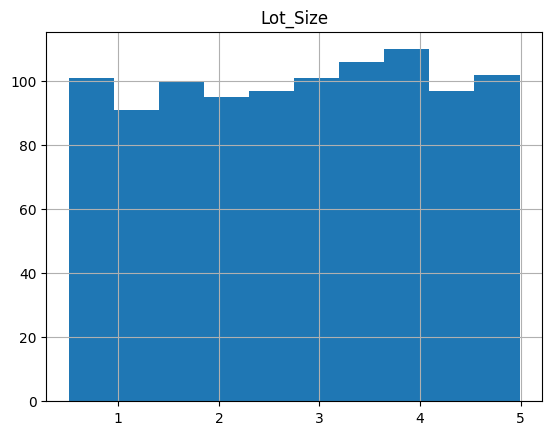

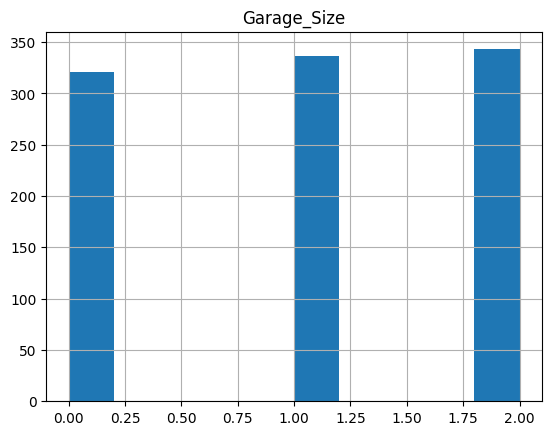

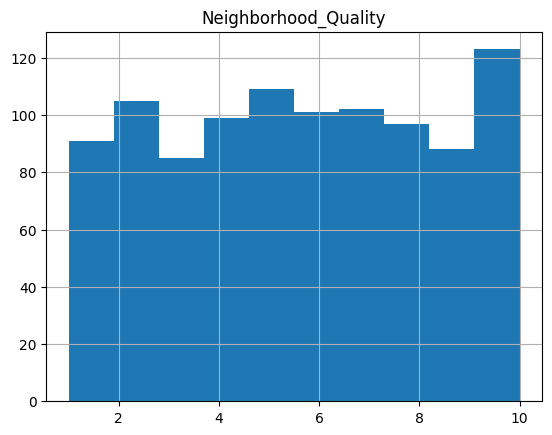

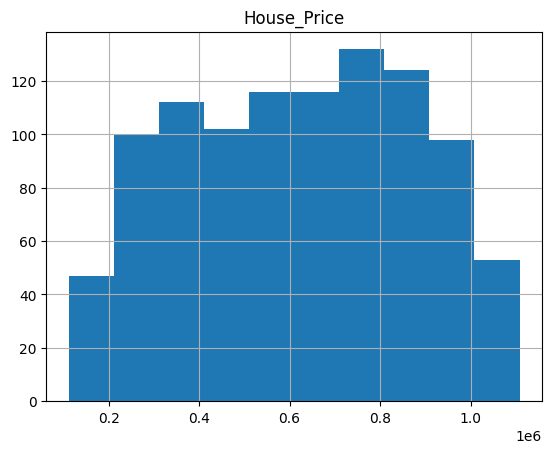

In [3]:
#histogram 

for column in raw_df.select_dtypes(include = "number"):
    plt.hist(raw_df[column])
    plt.grid()
    plt.title(column)
    plt.show()

In [4]:
#convert year by subtracting it with current year

import datetime

current_datetime = datetime.datetime.now()
current_year = current_datetime.year

def convert_year(x):
    return current_year - x

In [5]:
#apply the function to convert year

raw_df["Year_Built"] = raw_df["Year_Built"].apply(convert_year)
raw_df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,44,0.599637,0,5,2.623829e+05
1,4272,3,3,9,4.753014,1,6,9.852609e+05
2,3592,1,2,9,3.634823,0,9,7.779774e+05
3,966,1,2,48,2.730667,1,8,2.296989e+05
4,4926,2,1,32,4.699073,0,8,1.041741e+06
...,...,...,...,...,...,...,...,...
995,3261,4,1,47,2.165110,2,10,7.014940e+05
996,3179,1,2,26,2.977123,1,10,6.837232e+05
997,2606,4,2,63,4.055067,0,2,5.720240e+05
998,4723,5,2,75,1.930921,0,7,9.648653e+05


In [ ]:
#box plot 

for column in raw_df.select_dtypes(include = "number"):
    raw_df[column].plot(kind = "box")
    plt.grid()
    plt.title(column)
    plt.show()

df = raw_df

In [7]:
#split the data into X and y

X = df.drop("House_Price" , axis = 1)
y = df["House_Price"]

X.shape , y.shape

((1000, 7), (1000,))

In [8]:
#split the dataset into training and testing set

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

X_train.shape , y_train.shape , X_test.shape , y_test.shape

((800, 7), (800,), (200, 7), (200,))

In [9]:
#Linear Regression

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [10]:
#train the model

model.fit(X_train , y_train)

LinearRegression()

In [11]:
#predict the results of  testing dataset

y_pred = model.predict(X_test)

In [12]:
#r2 score , mean_squared_error , mean_absolute_error

from sklearn.metrics import r2_score, mean_squared_error , mean_absolute_error

print("R2 score            :" , r2_score(y_test , y_pred))
print("Mean Squared error  :" , mean_squared_error(y_test , y_pred))
print("Mean Absolute error :" , mean_absolute_error(y_test , y_pred))
print("Intercept           :" , model.intercept_)

R2 score            : 0.9985249236445247
Mean Squared error  : 97755879.42836837
Mean Absolute error : 7934.784957118109
Intercept           : 2506.0300827630563


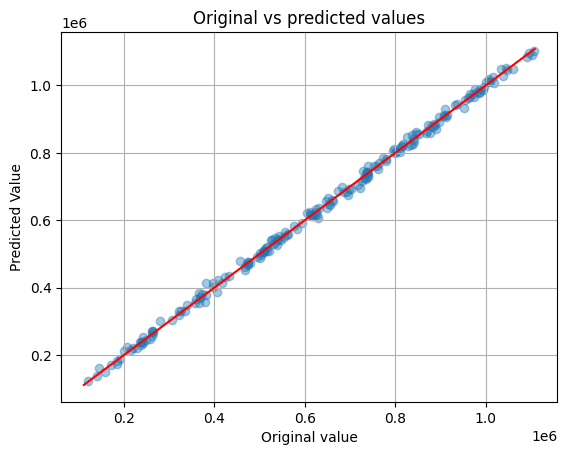

In [13]:
#scatter plot

plt.scatter(y_test , y_pred , alpha = 0.4)
plt.plot([y.min() , y.max()] , [y.min() , y.max()] , color="red")
plt.grid()
plt.title("Original vs predicted values")
plt.xlabel("Original value")
plt.ylabel("Predicted Value")
plt.show()

In [17]:
#decision tree

from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [20]:
#predict the values

dt_y_pred = dt_model.predict(X_test)

#r2 score , mean_squared_error , mean_absolute_error

from sklearn.metrics import r2_score, mean_squared_error , mean_absolute_error

print("R2 score            :" , r2_score(y_test , dt_y_pred))
print("Mean Squared error  :" , mean_squared_error(y_test , dt_y_pred))
print("Mean Absolute error :" , mean_absolute_error(y_test , dt_y_pred))

R2 score            : 0.983354541746254
Mean Squared error  : 1103123512.246142
Mean Absolute error : 26061.29730725076


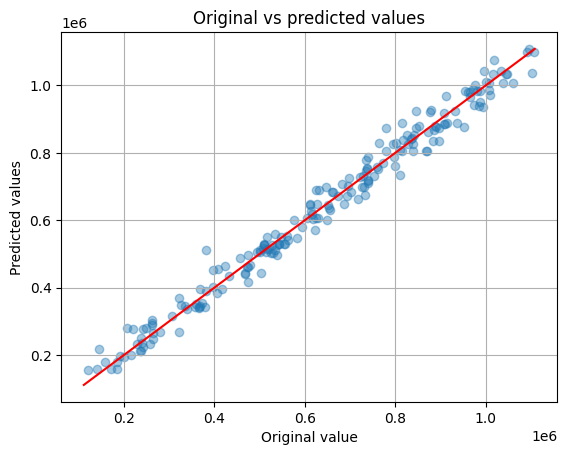

In [21]:
#scatter plot

plt.scatter(y_test , dt_y_pred , alpha = 0.4)
plt.plot([y.min() , y.max()] , [y.min() , y.max()] , color="red")
plt.grid()
plt.title("Original vs predicted values")
plt.xlabel("Original value")
plt.ylabel("Predicted values")
plt.show()